# Forward Propagation through HMM Timeseries
Randy Linderman  
Nov. 4, 2017
## Overview:
This notebook will create a function to execute the forward propagation step of the HMM. The program will be tested with random distributions. The notation and algorithms are adapted from Chapter 9: Hidden Markov Models of Speech and Language Processing. Daniel Jurafsky & James H. Martin. Copyright 2016. Draft of August 7, 2017. https://web.stanford.edu/~jurafsky/slp3/9.pdf
  
Forward Algorithm Equations:
\begin{eqnarray}  
P(O|Q) &=& \prod_{i=1}^T P(o_i|q_i) \\
P(O,Q) &=& P(O|Q)\times P(Q) = \prod_{i=1}^T P(o_i|q_i)\times \prod_{i=1}^T P(q_i|q_{i-1})
\end{eqnarray}

In [154]:
import numpy as np
import matplotlib.pyplot as plt


In [155]:
%matplotlib inline

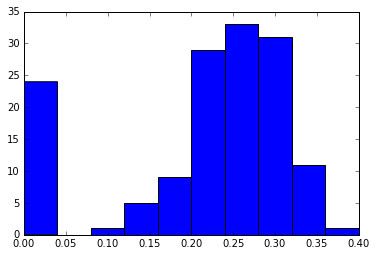

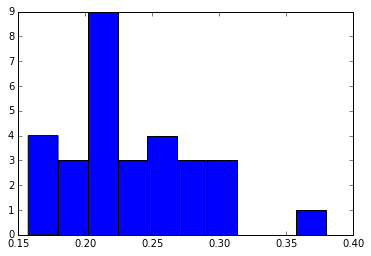

In [156]:
# Initialize dummy probability matrices A (Transition Probability Matrix) and B (Observation Likelihoods, Emission Probabilities)
# let N = number of hidden states = 10
# let M = number of observation states = 3
N = 10
M = 3


# Define A size(N+2, N+2); N.B.: A(0,0)=0, A(0,-1) = 0 (must have at least 1 observation), A(i, 0) = 0 & A((N+2)-1, i) = 0 for all 0 < i < N+2
mu, sigma = 0.25, 0.05
A = np.random.normal(mu,sigma,(N+2,N+2))
A[:,0] *= 0
A[-1,:] *= 0
A[0,-1] *= 0
# print A
plt.hist(A.reshape((-1)))
plt.show()

B = np.random.normal(mu,sigma, (N, M)) # N hidden states by M observation states
# print B
plt.hist(B.reshape((-1)))
plt.show()

theta = [A,B,N]
#print theta
#print theta[1]

In [157]:
def Forward(O, theta):
    A = theta[0]
    B = theta[1]
    N = theta[2]
    forward = np.zeros((N+2,len(O)+1))
    #alpha(state s, time t+1)
    
    # Initialization step
    for s in xrange(N):
        forward[s+1,0] = A[0,s+1]*B[s, O[0]]
    
    # Recursion Step
    for t in xrange(1,len(O)):
        for s in xrange(N):
            for sp in xrange(N):
                forward[s+1,t] += forward[sp+1,t-1]*A[sp+1,s]*B[s,O[t]]
    
    # Termination step
    for s in xrange(N):
        forward[-1,len(O)] += forward[s+1,len(O)-1]*A[s+1,-1]
    
    return forward[-1,len(O)]

In [158]:
print Forward([0,2,1,1,2],theta)

0.0149280023372


In [159]:
def Viterbi(O, theta):
    A = theta[0]
    B = theta[1]
    N = theta[2]
    viterbi = np.zeros((N+2,len(O)+1))
    backpointer = []
    #alpha(state s, time t+1)
    
    # Initialization step
    for s in xrange(N):
        viterbi[s+1,0] = A[0,s+1]*B[s, O[0]]
    #backpointer.append(-1)
    
    # Recursion Step
    for t in xrange(1,len(O)):
        backpointer.append(-1)
        for s in xrange(N):
            for sp in xrange(N):
                if viterbi[s+1,t] < viterbi[sp+1,t-1]*A[sp+1,s]*B[s,O[t]]:
                    viterbi[s+1,t] = viterbi[sp+1,t-1]*A[sp+1,s]*B[s,O[t]]
                    backpointer[-1] = sp+1
                    
    # Termination step
    backpointer.append(-1)
    for s in xrange(N):
        if viterbi[-1,len(O)] < viterbi[s+1,len(O)-1]*A[s+1,-1]:
            viterbi[-1,len(O)] = viterbi[s+1,len(O)-1]*A[s+1,-1]
            backpointer[-1] = s+1
    
    return backpointer

In [160]:
print Viterbi([0,2,1,1,2],theta)

[8, 8, 8, 8, 2]
